In [19]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

In [20]:
# Charger les données
X = np.load('X_tfidf.npy')
y = np.load('y.npy')

In [21]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialiser le modèle RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Entraîner le modèle
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

           1       0.67      0.31      0.42       108
           2       0.70      0.07      0.12       105
           3       0.51      0.16      0.24       231
           4       0.43      0.34      0.38       552
           5       0.64      0.91      0.75       959

    accuracy                           0.58      1955
   macro avg       0.59      0.36      0.38      1955
weighted avg       0.57      0.58      0.53      1955


Matrice de confusion :


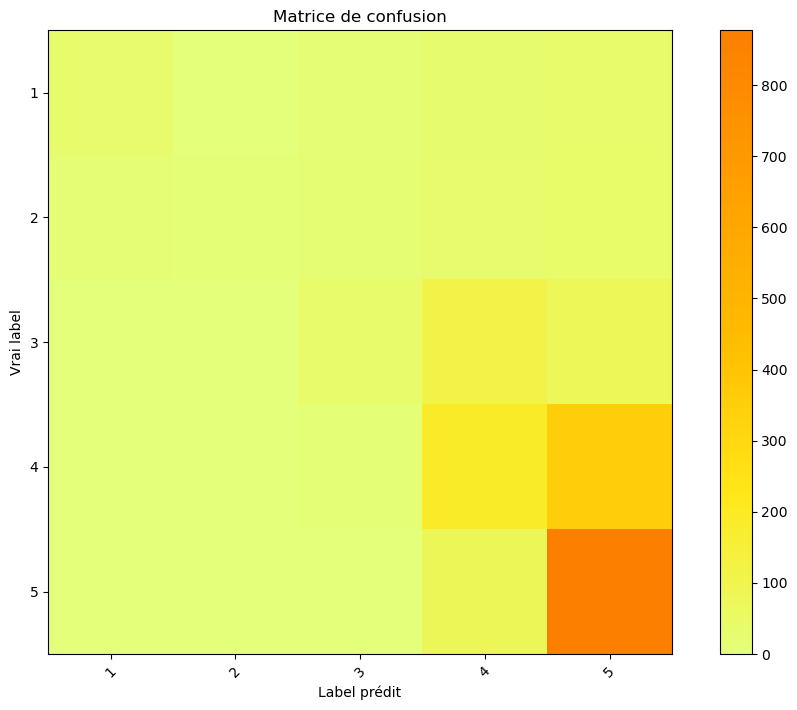

In [25]:
# Afficher la matrice de confusion
print("Matrice de confusion :")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.tight_layout()
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
plt.show()

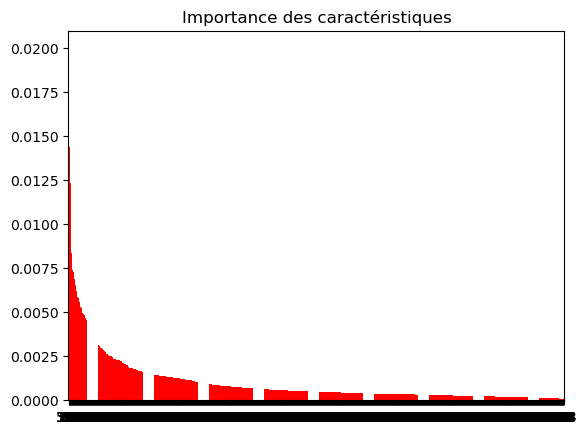

In [26]:
# Importance des caractéristiques
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importance des caractéristiques")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [27]:
# Ajustement des hyperparamètres avec GridSearchCV (exemple simplifié)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

Meilleurs paramètres trouvés :
{'max_depth': None, 'n_estimators': 200}


In [28]:
# Entraîner le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

In [29]:
# Sauvegarder le modèle
joblib.dump(best_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [30]:
# Charger le modèle (pour une utilisation future)
loaded_model = joblib.load('random_forest_model.joblib')

In [31]:
# Utiliser le modèle chargé pour faire des prédictions
loaded_model_pred = loaded_model.predict(X_test)
print("Rapport de classification du modèle chargé :")
print(classification_report(y_test, loaded_model_pred))

Rapport de classification du modèle chargé :
              precision    recall  f1-score   support

           1       0.63      0.33      0.44       108
           2       0.57      0.04      0.07       105
           3       0.53      0.14      0.23       231
           4       0.44      0.34      0.39       552
           5       0.63      0.93      0.75       959

    accuracy                           0.59      1955
   macro avg       0.56      0.36      0.37      1955
weighted avg       0.56      0.59      0.53      1955


In [32]:
# Sauvegarde du modèle RandomForest
joblib.dump(model, 'random_forest_model.joblib')

FileNotFoundError: [Errno 2] No such file or directory: '/data/random_forest_model.joblib'

In [ ]:
# Charger le vectoriseur TF-IDF
vectorizer = joblib.load('/data/tfidf_vectorizer.joblib')

In [ ]:
# Charger le modèle RandomForest
model = joblib.load('/data/random_forest_model.joblib')

In [ ]:
# Nouvelle entrée d'avis
new_review = ["This hotel was nice and quiet. Did not know, there was train track near by. But it was only few train passed during our stay. Best Western changed hotel classification. The Plus category are not the same as before."]

In [ ]:
# Transformer l'avis en utilisant le vectoriseur TF-IDF chargé
new_review_tfidf = vectorizer.transform(new_review)

In [ ]:
# Prédire la note pour la nouvelle entrée
predicted_note = model.predict(new_review_tfidf)

In [ ]:
print("La note prédite pour l'avis est :", predicted_note[0])